### IS727272 - Cordero Hernández, Marco Ricardo

# DT - 1 Árboles de Decisión, Clasificación binaria de Pacientes

In [1]:
import pandas as pd

In [2]:
pacientes = pd.read_csv('./Datasets/Pacientes2.csv', index_col = 0)
pacientes.head()

,Enfermedad,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,,
1,NO,0,0,1,0,0,38,0,0,0,0
2,SI,0,1,1,1,1,49,1,0,0,0
3,SI,1,1,0,1,1,59,1,0,0,1
4,NO,1,1,0,0,0,44,0,0,0,0
5,NO,0,0,1,0,0,42,0,0,0,0


In [3]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 909
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Enfermedad  985 non-null    object
 1   HIPERTEN    985 non-null    int64 
 2   HIPERGLU    985 non-null    int64 
 3   HDLBAJA     985 non-null    int64 
 4   HIPERTRI    985 non-null    int64 
 5   CINTALTA    985 non-null    int64 
 6   EDAD        985 non-null    int64 
 7   GENERO      985 non-null    int64 
 8   FUMA        985 non-null    int64 
 9   ALCOHOL     985 non-null    int64 
 10  POLIURIA    985 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 92.3+ KB


In [4]:
# Matriz de atributos
X = pacientes.iloc[:, 1:]

# Variable a predecir
y = pacientes.iloc[:, 0]

X.head()

,HIPERTEN,HIPERGLU,HDLBAJA,HIPERTRI,CINTALTA,EDAD,GENERO,FUMA,ALCOHOL,POLIURIA
NOEXPED,,,,,,,,,,
1,0,0,1,0,0,38,0,0,0,0
2,0,1,1,1,1,49,1,0,0,0
3,1,1,0,1,1,59,1,0,0,1
4,1,1,0,0,0,44,0,0,0,0
5,0,0,1,0,0,42,0,0,0,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train.shape

(738, 10)

In [7]:
X_test.shape

(247, 10)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Llamar al constructor del árbol de decisión
arbol = DecisionTreeClassifier()

# Entrenamos el modelo
arbol_enfermedad = arbol.fit(X_train, y_train)

Ahora se va a graficar el árbol de decisión

### Notas importantes
- Todas las flechas del lado izquierdo pertenecen a la respuesta "Verdadero", y las del derecho a la respuesta "Falso"
- Probablemente se obtendrá un árbol diferente para cada ejecución, ya que los números de fila se asignan aleatoriamente
- Lo anterior aplica también para la precisión (accuracy), ya que, al tener un árbol diferente, se obtendrán resultados distintos

<function matplotlib.pyplot.show(close=None, block=None)>

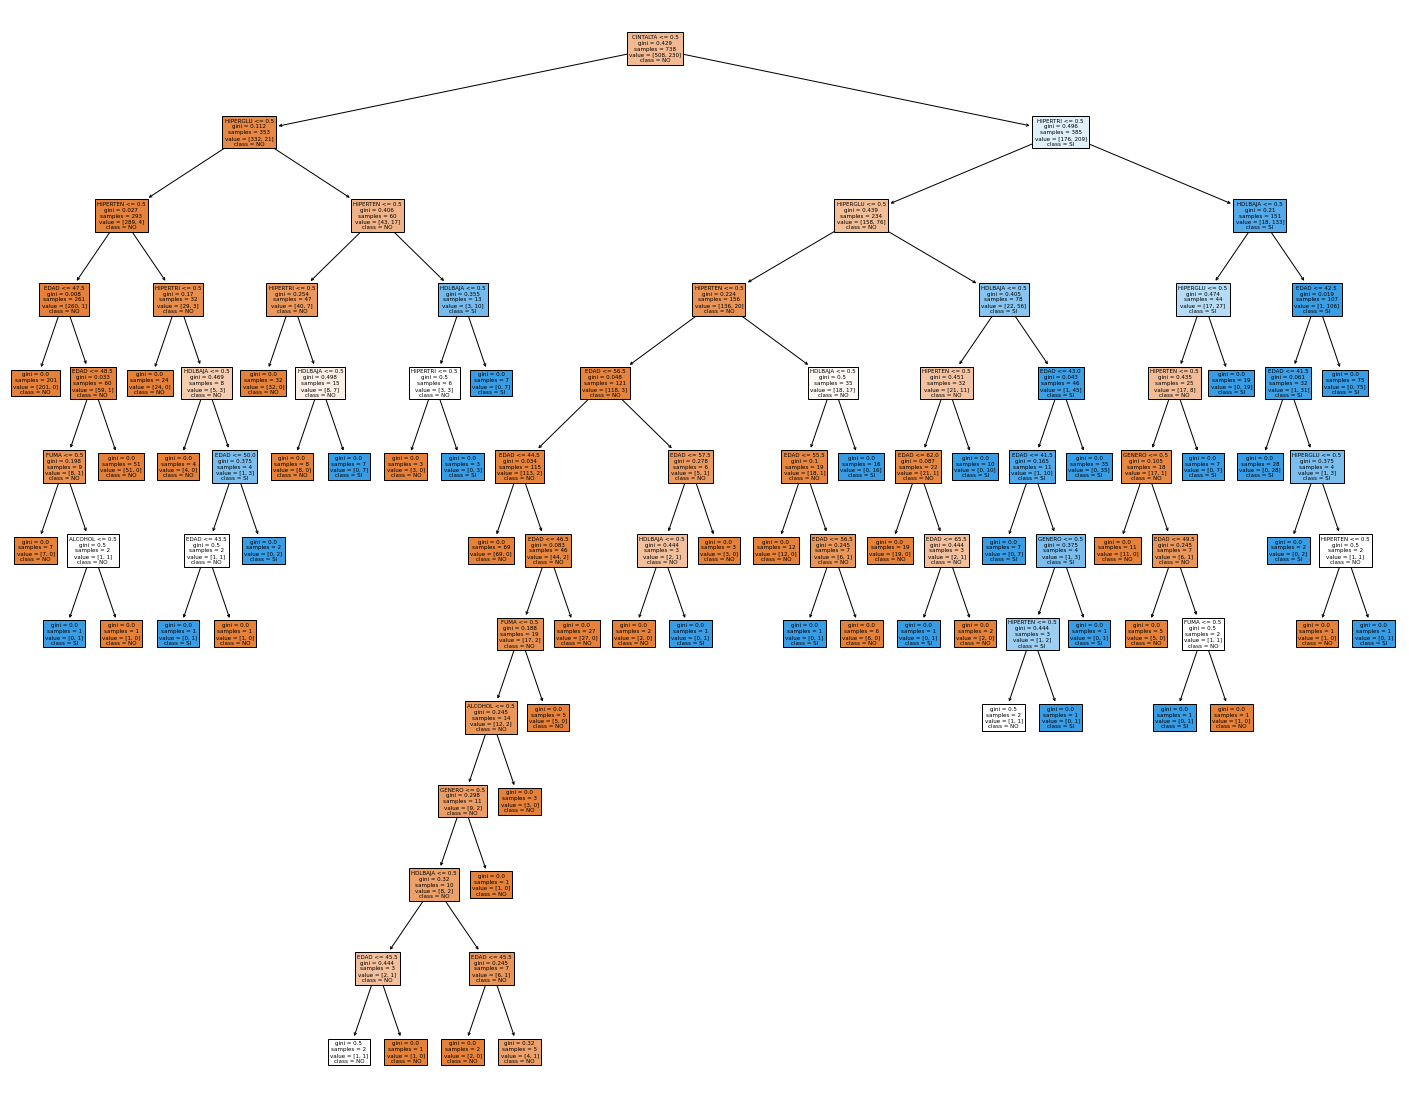

In [9]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (25, 20)) # Dimensiones del gráfico
tree.plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [10]:
# Guardar el árbol en un archivo
# fig.savefig('Árbol.png', dpi = 500)
fig.savefig('Árbol.svg')

In [11]:
# Predicción con el testing
Y_pred = arbol_enfermedad.predict(X_test)
Y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

## Precisión del Modelo

In [12]:
from sklearn.metrics import confusion_matrix

Matriz_de_confusion = confusion_matrix(y_test, Y_pred)
Matriz_de_confusion

array([[176,   5],
       [  2,  64]], dtype=int64)

In [13]:
import numpy as np

Precision_global = np.sum(Matriz_de_confusion.diagonal()) / np.sum(Matriz_de_confusion)
Precision_global

0.97165991902834

In [14]:
Precision_No = Matriz_de_confusion[0, 0] / sum(Matriz_de_confusion[0,])
Precision_No

0.9723756906077348

In [15]:
Precision_Si = Matriz_de_confusion[1, 1] / sum(Matriz_de_confusion[1,])
Precision_Si

0.9696969696969697

### Pruning

<function matplotlib.pyplot.show(close=None, block=None)>

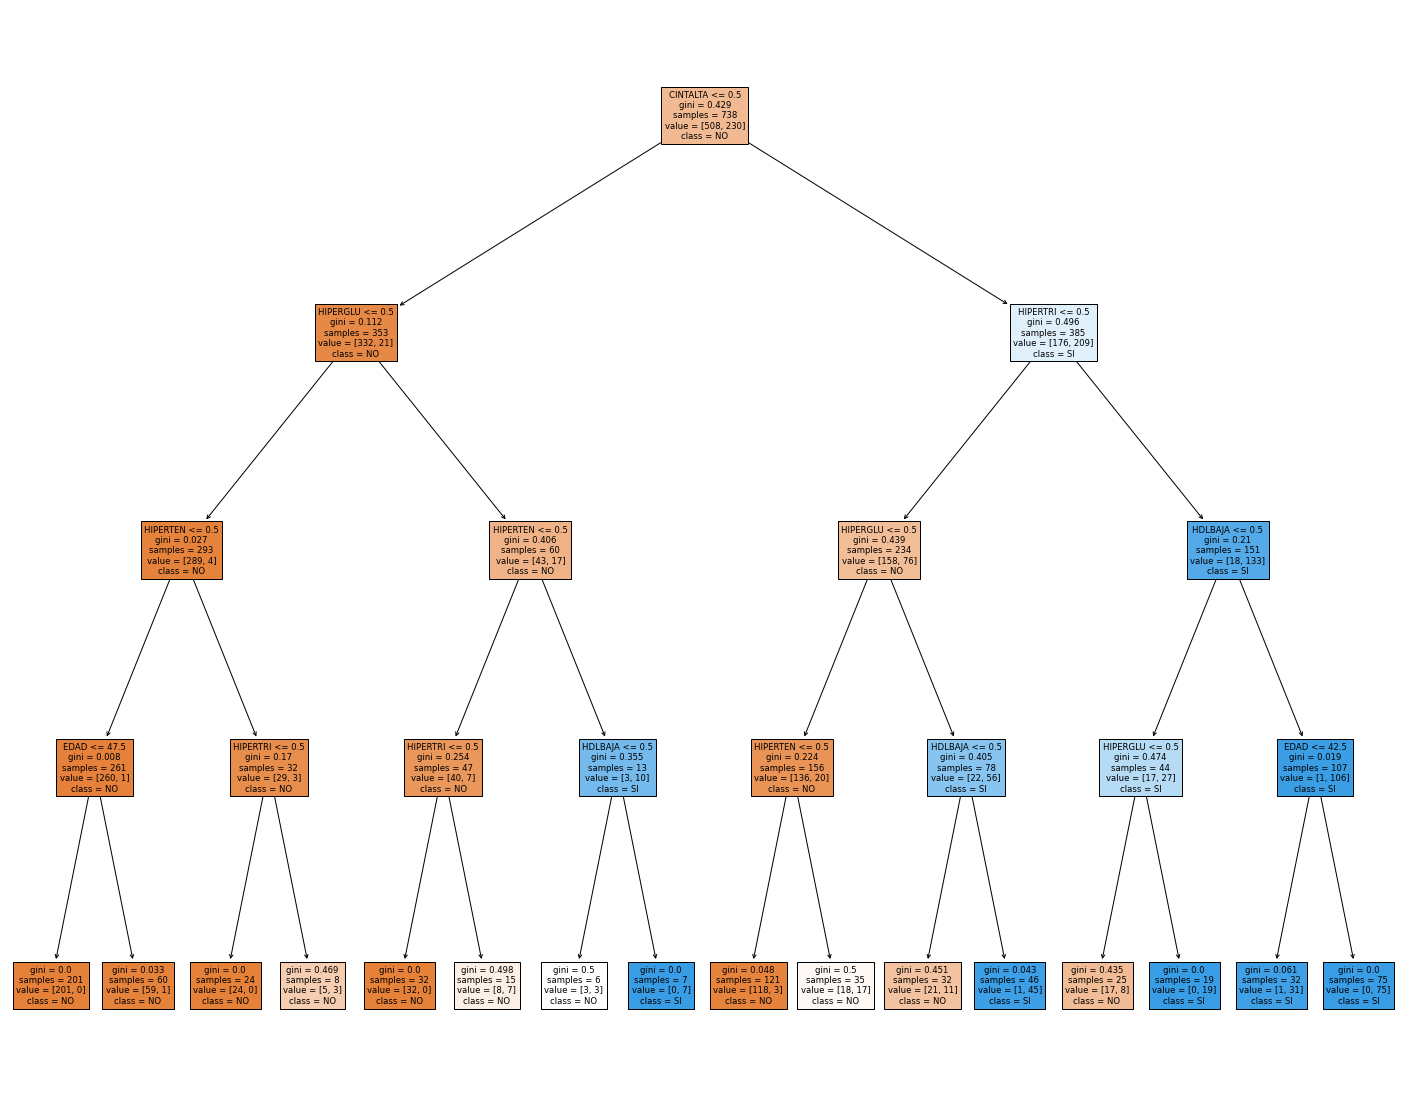

In [16]:
arbol = DecisionTreeClassifier(max_depth = 4)
arbol_enfermedad = arbol.fit(X_train, y_train)
fig = plt.figure(figsize = (25, 20))
tree.plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [17]:
Y_pred = arbol_enfermedad.predict(X_test)
Y_pred

array(['SI', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'SI', 'NO', 'SI', 'SI', 'SI', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI', 'NO', 'NO',
       'SI', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'SI', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI',
       'NO', 'NO', 'NO', 'NO', 'SI', 'SI', 'NO', 'SI', 'NO', 'NO', 'SI',
       'NO', 'NO', 'SI', 'NO', 'NO', 'SI', 'SI', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO', 'NO', 'SI', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'N

In [18]:
Matriz_de_confusion = confusion_matrix(y_test, Y_pred)
Matriz_de_confusion

array([[178,   3],
       [ 12,  54]], dtype=int64)

In [19]:
Precision_global = np.sum(Matriz_de_confusion.diagonal()) / np.sum(Matriz_de_confusion)
Precision_global

0.9392712550607287

In [20]:
Precision_No = Matriz_de_confusion[0, 0] / sum(Matriz_de_confusion[0,])
Precision_No

0.9834254143646409

In [21]:
Precision_Si = Matriz_de_confusion[1, 1] / sum(Matriz_de_confusion[1,])
Precision_Si

0.8181818181818182

<function matplotlib.pyplot.show(close=None, block=None)>

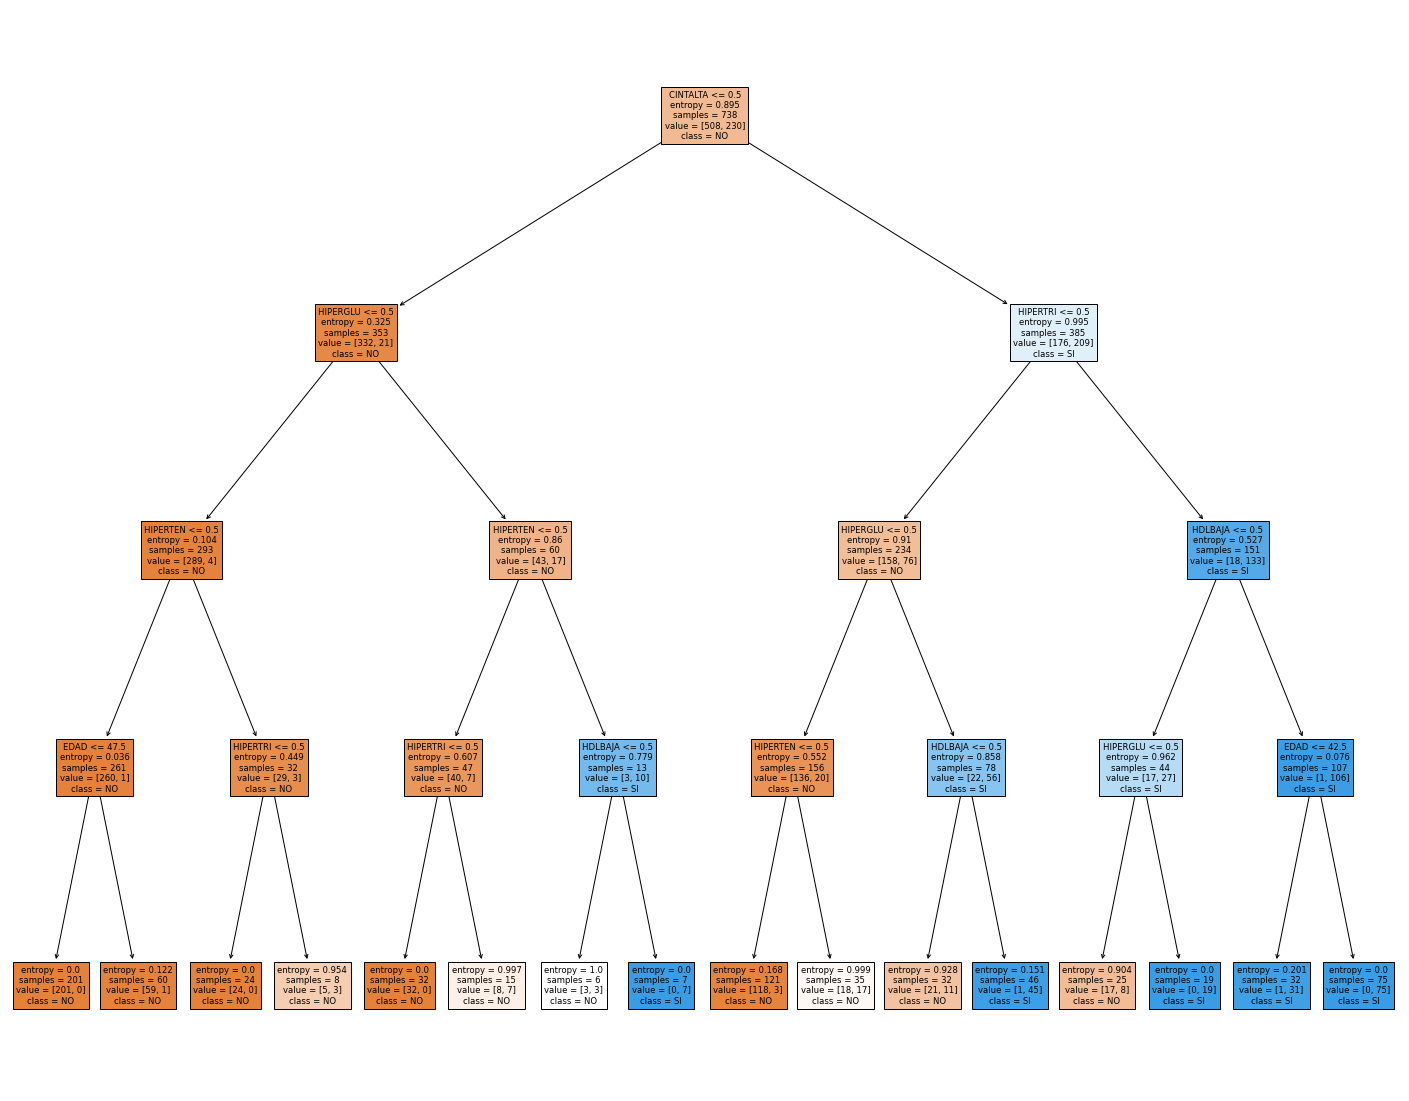

In [22]:
arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
arbol_enfermedad = arbol.fit(X_train, y_train)
fig = plt.figure(figsize = (25, 20))
tree.plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [23]:
Y_pred = arbol_enfermedad.predict(X_test)
Matriz_de_confusion = confusion_matrix(y_test, Y_pred)
Matriz_de_confusion

array([[178,   3],
       [ 12,  54]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

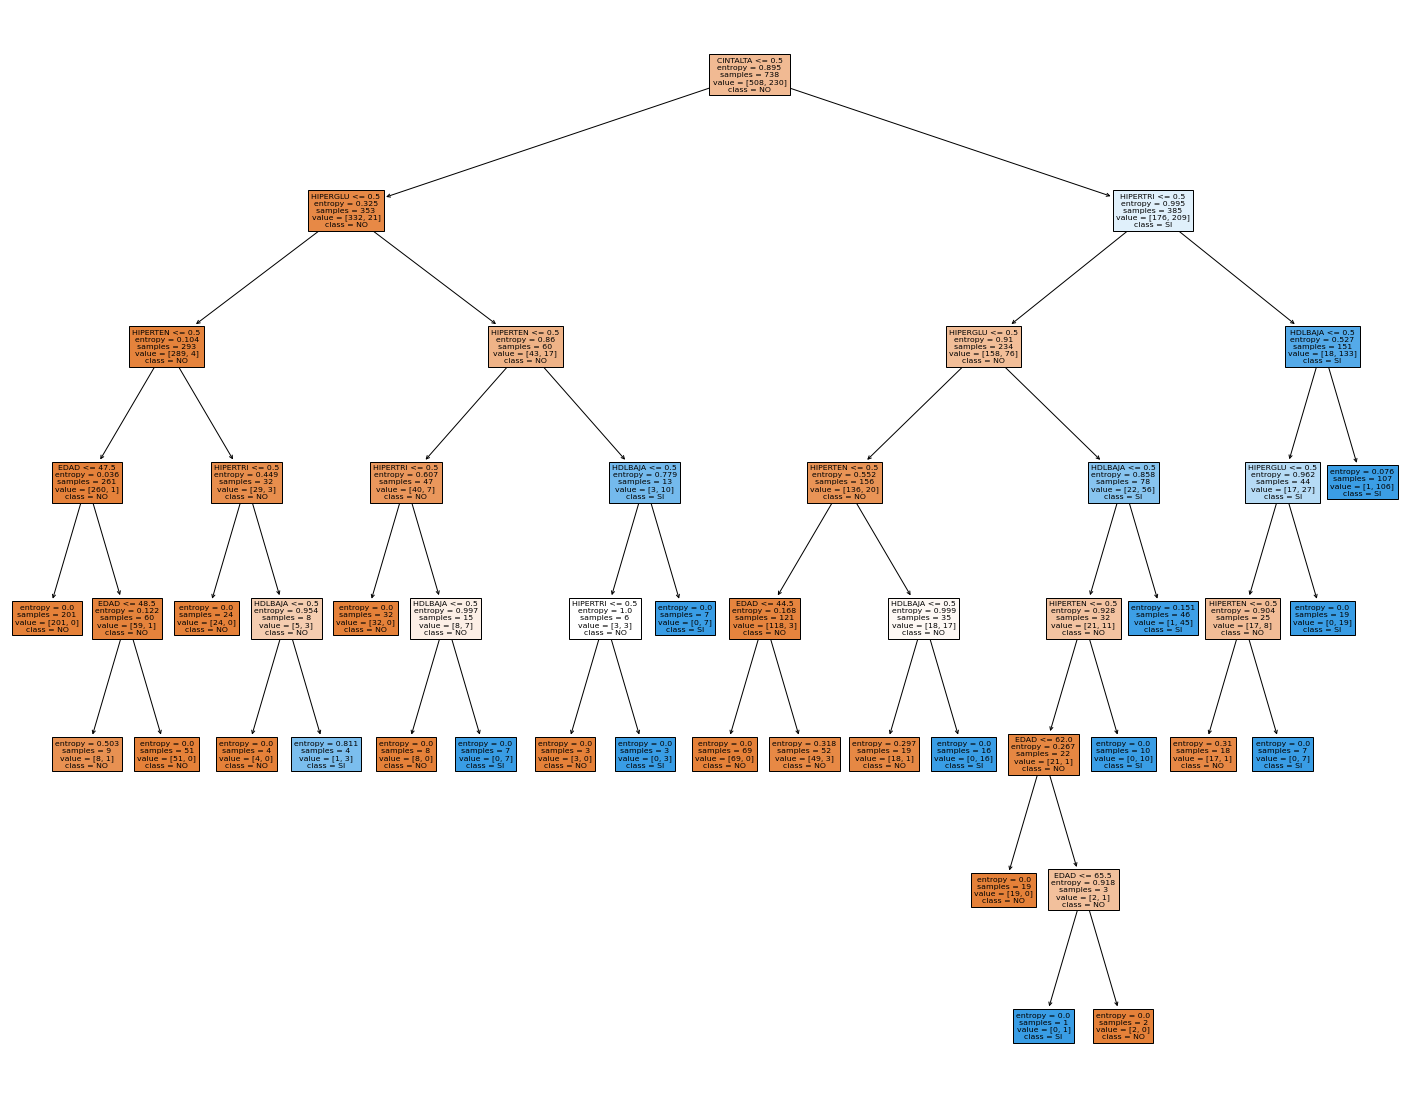

In [24]:
arbol = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 25)
arbol_enfermedad = arbol.fit(X_train, y_train)
fig = plt.figure(figsize = (25, 20))
tree.plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [25]:
Y_pred = arbol_enfermedad.predict(X_test)
Matriz_de_confusion = confusion_matrix(y_test, Y_pred)
Matriz_de_confusion

array([[178,   3],
       [  0,  66]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

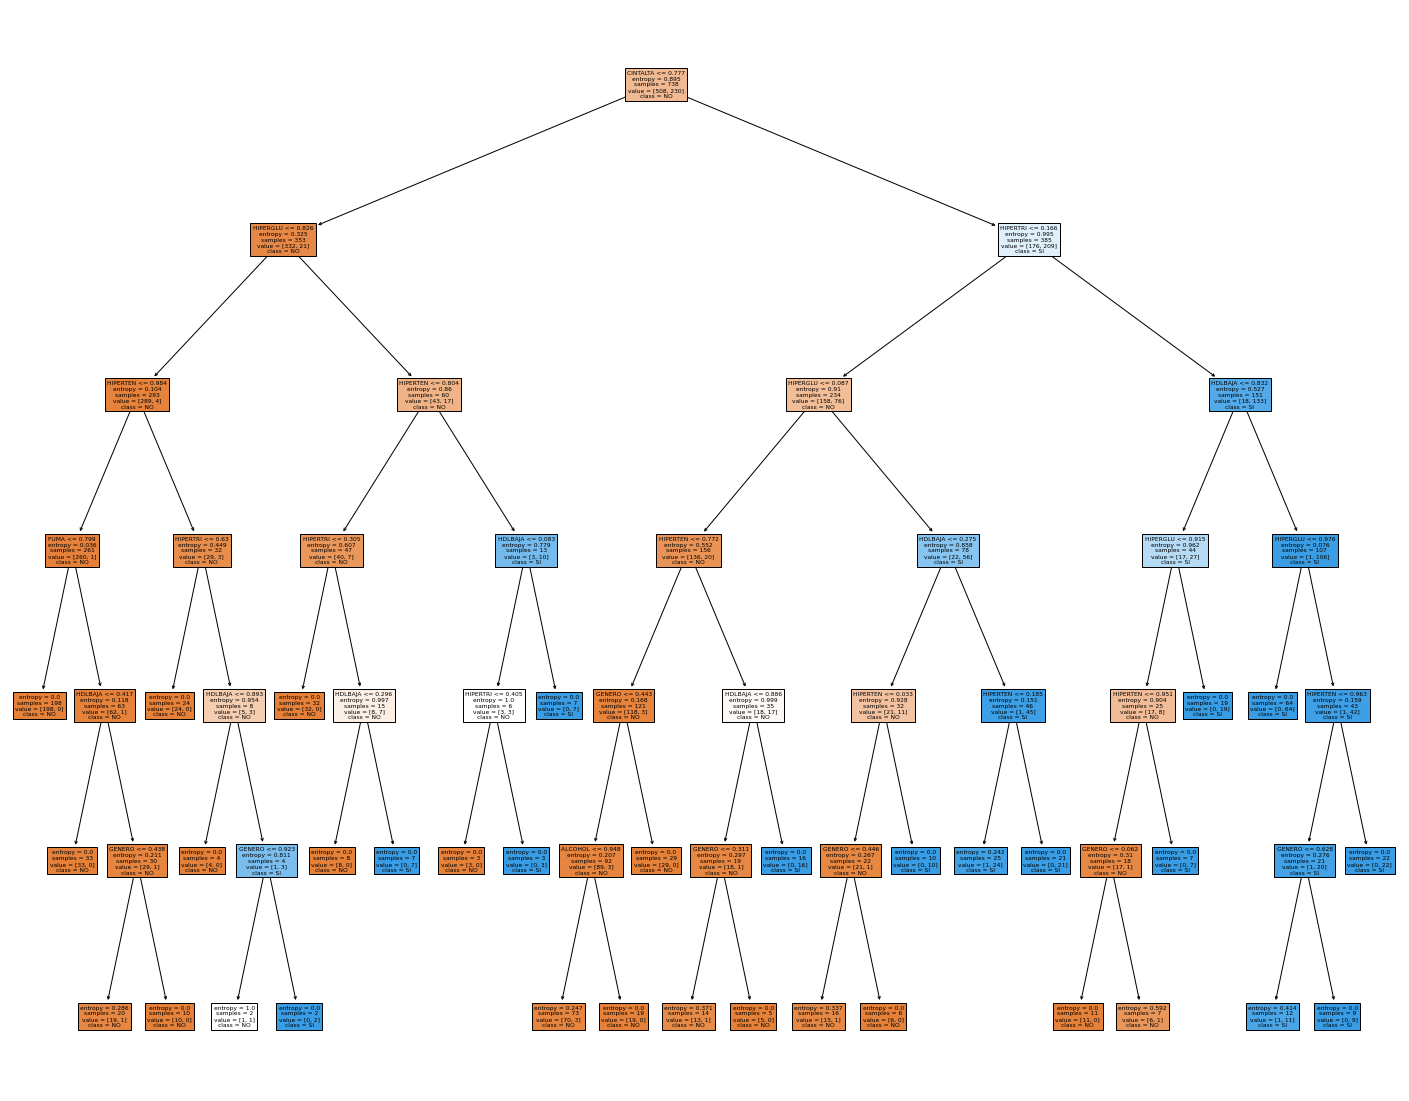

In [26]:
arbol = DecisionTreeClassifier(max_leaf_nodes = 33, max_depth = 6, criterion = 'entropy', splitter = 'random')
arbol_enfermedad = arbol.fit(X_train, y_train)
fig = plt.figure(figsize = (25, 20))
tree.plot_tree(arbol_enfermedad, feature_names = list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [27]:
Y_pred = arbol_enfermedad.predict(X_test)
Matriz_de_confusion = confusion_matrix(y_test, Y_pred)
Matriz_de_confusion

array([[178,   3],
       [  0,  66]], dtype=int64)